# MODEL GUESS PRICING

In [6]:
import pandas as pd
df0 = pd.read_csv("train.csv")
from sklearn.model_selection import train_test_split

In [7]:
def preprocessing(df):
    df['total_rooms'] = df['TotRmsAbvGrd'] + df['BsmtFullBath']
    df['price_by_building'] = df['SalePrice'] / (df['GrLivArea'] + df['GarageArea'] + df['TotalBsmtSF'])
    df['qual_area_pound'] = df['OverallQual'] * df['GrLivArea']
    
    df.drop_duplicates()
#     drop outsider qual area pound
    df = df.drop(523)
    df = df.drop(1298)
#     drop outsider price by building
    df = df.drop(533)
#     create a bool columns for yearbuilt
    df['built_after_85'] = df['YearBuilt'] > 1985
    df = df[['total_rooms', 'price_by_building', 'TotalBsmtSF', 'GarageArea', 'qual_area_pound', 'SalePrice']]
    return df

df = df0.copy()
df = preprocessing(df)

df

,total_rooms,price_by_building,TotalBsmtSF,GarageArea,qual_area_pound,SalePrice
0,9,66.955684,856,548,11970,208500
1,6,60.824397,1262,460,7572,181500
2,7,67.441159,920,608,12502,223500
3,8,44.943820,756,642,12019,140000
4,10,59.822924,1145,836,17584,250000
...,...,...,...,...,...,...
1455,7,57.189542,953,460,9882,175000
1456,8,51.032807,1542,500,12438,210000
1457,9,71.180556,1152,252,16380,266500
1458,6,59.317613,1078,240,5390,142125


In [8]:
def normalise (df):
    for column in df.columns:
        if column in df.columns:
            _df = pd.get_dummies(df[column])
            df = pd.concat([df, _df], axis=1, sort=False)
            df.drop(columns=[column], inplace=True)
    

In [9]:
import plotly.express as px

In [17]:
fig = px.scatter(df,
    x='qual_area_pound', 
    y='SalePrice', 
    labels={
         "qual_area_pound": "Rapport qualité x surface",
         "SalePrice": "Prix de vente",
     },
    title="Répartition du poid (qualité/surface) par prix de vente"
    )             

fig.show()

In [26]:
fig = px.scatter(df,
    x='GarageArea', 
    y='SalePrice', 
    labels={
         "GarageArea": "Surface du garage",
         "SalePrice": "Prix de vente",
     },
    title="Répartition entre la surface du garage et du prix de vente"
    )             

fig.show()

In [28]:
fig = px.scatter(df,
    x='TotalBsmtSF', 
    y='SalePrice', 
    labels={
         "TotalBsmtSF": "Nombre de m² construit au dessus du sous sol",
         "SalePrice": "Prix de vente",
     },
    title="Répartition entre la surface du garage et du prix de vente"
    )             

fig.show()

In [21]:
fig = px.scatter(df,
    x='price_by_building', 
    y='SalePrice', 
    labels={
         "price_by_building": "Prix au m²",
         "SalePrice": "Prix de vente",
     },
    title="Répartition du prix au m² par rapport au prix de vente"
    )   
fig.show()

In [ ]:
fig = px.scatter(x=df['TotalBsmtSF'], y=df['SalePrice'])
fig.show()

In [22]:
fig = px.scatter(x=df['total_rooms'], y=df['SalePrice'])
fig.show()

In [23]:
fig = px.bar(df, x='total_rooms', y='SalePrice')
fig.show()

In [ ]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='total_rooms'>

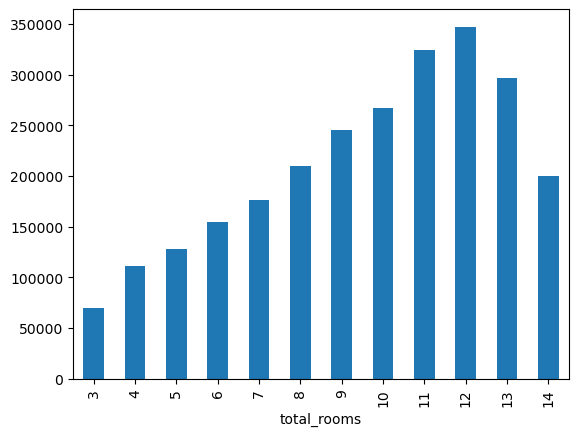

In [24]:
df.groupby(df["total_rooms"]).mean()["SalePrice"].plot(kind="bar")

In [ ]:
df.groupby(df["FullBath"]).mean()["SalePrice"].plot(kind="bar")

In [25]:
df.groupby(df["TotRmsAbvGrd"]).mean()["SalePrice"].plot(kind="bar")

KeyError: 'TotRmsAbvGrd'

In [ ]:
df.corr()